In [1]:
class SimpleLinearRegression():
    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num = num + ((y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean()))
            den = den + ((X_train[i] - X_train.mean())**2)
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())

        return self.m, self.b
    
    def predict(self, X_test):
        return self.m*X_test + self.b

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


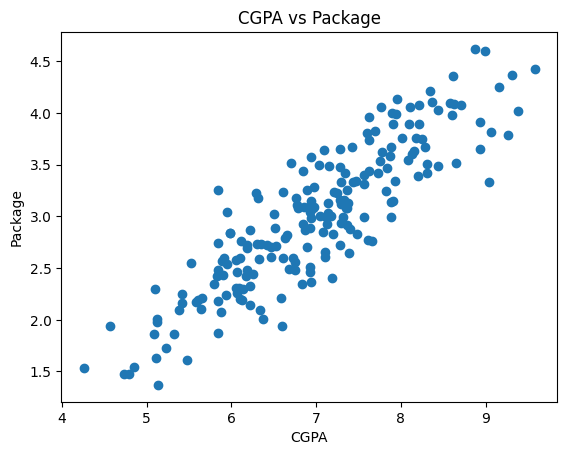

In [5]:
plt.title('CGPA vs Package')
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [6]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [8]:
lr = SimpleLinearRegression()

In [9]:
lr.fit(X_train, y_train)

(0.5579519734250721, -0.8961119222429152)

In [10]:
lr.predict(X_test[0])

3.891116009744203

In [11]:
y_pred = lr.predict(X_test)

In [12]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7807301475103842

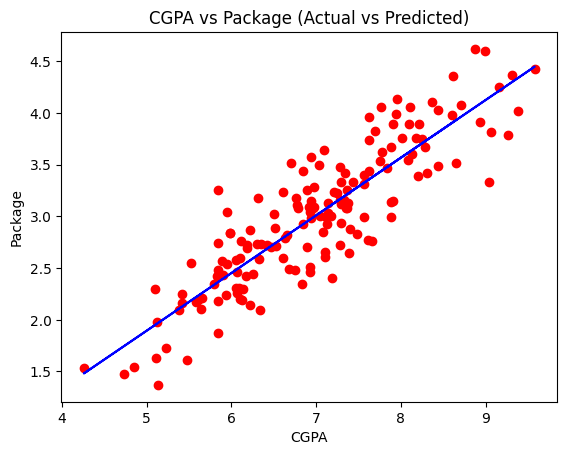

In [13]:
plt.title('CGPA vs Package (Actual vs Predicted)')
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, lr.predict(X_train), color='blue')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()